# **Prerequisites**

In [ ]:
#installing pandas
%pip install pandas

In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [ ]:
#loading the datasets
movies = pd.read_csv("dataset.csv") #for content based filtering
movies_new = pd.read_csv("movies.csv") #for collaborative filtering
ratings = pd.read_csv("ratings.csv") #for collaborative filtering

## **Data Preprocessing for Content Based Filtering**

In [ ]:
#retrieving the first 05 rows of data in 'movies' dataframe
movies.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [ ]:
#generating descriptive statistics
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [ ]:
#generating a concise summary of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [ ]:
#checking for null values
movies.isnull().sum()

,0
id,0
title,0
genre,3
original_language,0
overview,13
popularity,0
release_date,0
vote_average,0
vote_count,0


In [ ]:
#retrieving the column names
movies.columns


Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
#selecting specific columns from the dataframe
movies  = movies[['id', 'title', 'overview', 'genre']]

In [ ]:
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [ ]:
#concatenating the values of the 'overview' and 'genre' columns into 'tags' column
movies.loc[:, 'tags'] = movies['overview'] + movies['genre']

In [ ]:
#displaying the dataframe
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [ ]:
#dropping the overview and genre columns
new_data = movies.drop(columns=['overview', 'genre'])
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


# **Content Based Filtering**

In [ ]:
#cleaning text by lowercasing, removing punctuation and stopwords, tokenizing, lemmatizing, and rejoining words for analysis.



#importing the dependancies
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#downloading the nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
  #checking if text is not a string
  if not isinstance(text, str):
    return ""
  #converting to lowercase
  text = text.lower()

  #removing punctuation but keeping digits
  text = re.sub(r'[^\w\s\d]', '', text)

  #tokenizing the words
  words = word_tokenize(text)

  #removing stopwords
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]

  #lemmatize
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]

  #joining the words back together
  text = ' '.join(words)
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#tokenizing, cleaning, and Updating the 'tags' Column in new_data.
import nltk
nltk.download('punkt')
new_data['tags_clean'] =  new_data['tags'].apply(clean_text)
new_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,title,tags,tags_clean
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,framed 1940s double murder wife lover upstandi...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",raj rich carefree happygolucky second generati...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",spanning year 1945 1955 chronicle fictional it...
3,424,Schindler's List,The true story of how businessman Oskar Schind...,true story businessman oskar schindler saved t...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,continuing saga corleone crime family young vi...
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...",story follows adventure aang young successor l...
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,shark take bite east coast sharknado hit washi...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...",world war ii brave patriotic american soldier ...
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,man named farmer set rescue kidnapped wife ave...


In [ ]:
#displaying the 'new_data' dataframe
new_data

,id,title,tags,tags_clean
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,framed 1940s double murder wife lover upstandi...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",raj rich carefree happygolucky second generati...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",spanning year 1945 1955 chronicle fictional it...
3,424,Schindler's List,The true story of how businessman Oskar Schind...,true story businessman oskar schindler saved t...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,continuing saga corleone crime family young vi...
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...",story follows adventure aang young successor l...
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,shark take bite east coast sharknado hit washi...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...",world war ii brave patriotic american soldier ...
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,man named farmer set rescue kidnapped wife ave...


In [ ]:
#importing CountVectorizer from sklearn.feature_extraction.text to convert text data into a Bag-of-Words (BoW) representation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#installing scikit-learn for text feature extraction
pip install scikit-learn

In [ ]:
#cleaning the text in the 'tags' column using clean_text() and storing the result in the 'tags_clean' column of new_data
new_data['tags_clean'] = new_data['tags'].apply(clean_text)
new_data

,id,title,tags,tags_clean
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,framed 1940s double murder wife lover upstandi...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",raj rich carefree happygolucky second generati...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",spanning year 1945 1955 chronicle fictional it...
3,424,Schindler's List,The true story of how businessman Oskar Schind...,true story businessman oskar schindler saved t...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,continuing saga corleone crime family young vi...
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...",story follows adventure aang young successor l...
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,shark take bite east coast sharknado hit washi...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...",world war ii brave patriotic american soldier ...
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,man named farmer set rescue kidnapped wife ave...


In [ ]:
#importing train_test_split from sklearn.model_selection to split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

In [ ]:
#importing CountVectorizer to convert text into a bag-of-words matrix
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#spliting new_data into training and testing sets, with 80% for training and 20% for testing, using a random seed of 42.
train_data, test_data = train_test_split(new_data, test_size=0.2, random_state=42)

In [ ]:
#initializing CountVectorizer with a maximum of 10,000 features and removing English stopwords during the text vectorization process.
cv = CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
#vectorizing the 'tags_clean' column into a numerical array of token counts.
vector = cv.fit_transform(new_data['tags_clean'].values.astype('U')).toarray()

In [ ]:
#referencing the 'tags' column in the new_data dataframe, which contains the original text data before any cleaning or transformation.
new_data['tags']

,tags
0,Framed in the 1940s for the double murder of h...
1,"Raj is a rich, carefree, happy-go-lucky second..."
2,"Spanning the years 1945 to 1955, a chronicle o..."
3,The true story of how businessman Oskar Schind...
4,In the continuing saga of the Corleone crime f...
...,...
9995,"The story follows the adventures of Aang, a yo..."
9996,The sharks take bite out of the East Coast whe...
9997,"During World War II, a brave, patriotic Americ..."
9998,A man named Farmer sets out to rescue his kidn...


In [ ]:
#displaying the number of rows and columns in the tokenized representation.
vector.shape

(10000, 10000)

In [ ]:
#calculating the cosine similarity between the vectors in the dataset.
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.03175003, 0.03035884, ..., 0.0862796 , 0.09274778,
        0.03745029],
       [0.03175003, 1.        , 0.05976143, ..., 0.        , 0.        ,
        0.        ],
       [0.03035884, 0.05976143, 1.        , ..., 0.        , 0.04364358,
        0.03524537],
       ...,
       [0.0862796 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09274778, 0.        , 0.04364358, ..., 0.        , 1.        ,
        0.        ],
       [0.03745029, 0.        , 0.03524537, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#displaying the summary information of the new_data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   title       10000 non-null  object
 2   tags        9985 non-null   object
 3   tags_clean  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
#finding and printing the titles of the top 05 most similar movies to the one with index 04
distance = sorted(list(enumerate(similarity[4])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
  print(new_data.iloc[i[0]].title)

The Godfather: Part II
The Godfather
The Godfather: Part III
Brooklyn
Kind Hearts and Coronets


In [ ]:
#defining a recommend function to print the top 05 similar movies to a given movie title
def recommend (movies):
  index = new_data[new_data['title'] == movies].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
  for i in distance[1:6]:
    print(new_data.iloc[i[0]].title)

In [ ]:
#displaying the movie recommendations for a given movie title
recommend("Schindler's List")

Resistance
The Counterfeiters
Mongol: The Rise of Genghis Khan
Defiance
Life Is Beautiful


In [ ]:
#importing pickle
import pickle

In [ ]:
#serializing and saving the new_data dataframe and the similarity matrix
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [ ]:
#loading the serialized movies_list.pkl file and deserializing it back into the new_data dataframe
pickle.dump(new_data, open('similarity.pkl', 'wb'))

In [ ]:
#opening the file 'movies_list.pkl' in binary mode and loading the stored object back into Python
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags,tags_clean
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,framed 1940s double murder wife lover upstandi...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",raj rich carefree happygolucky second generati...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",spanning year 1945 1955 chronicle fictional it...
3,424,Schindler's List,The true story of how businessman Oskar Schind...,true story businessman oskar schindler saved t...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,continuing saga corleone crime family young vi...
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...",story follows adventure aang young successor l...
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,shark take bite east coast sharknado hit washi...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...",world war ii brave patriotic american soldier ...
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,man named farmer set rescue kidnapped wife ave...


# **Item-Based Collaborative Filtering**

In [ ]:
#displaying the first 5 rows in 'movies_new' dataframe
print(movies_new.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
#displaying the first 5 rows in 'ratings' dataframe
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#creating a user-item matrix from the ratings dataframe using the .pivot() function in pandas.
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#replacing all missing values in the user-item matrix with 0
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#calculating the no. of ratings for each movie and the no. of ratings provided by each user
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

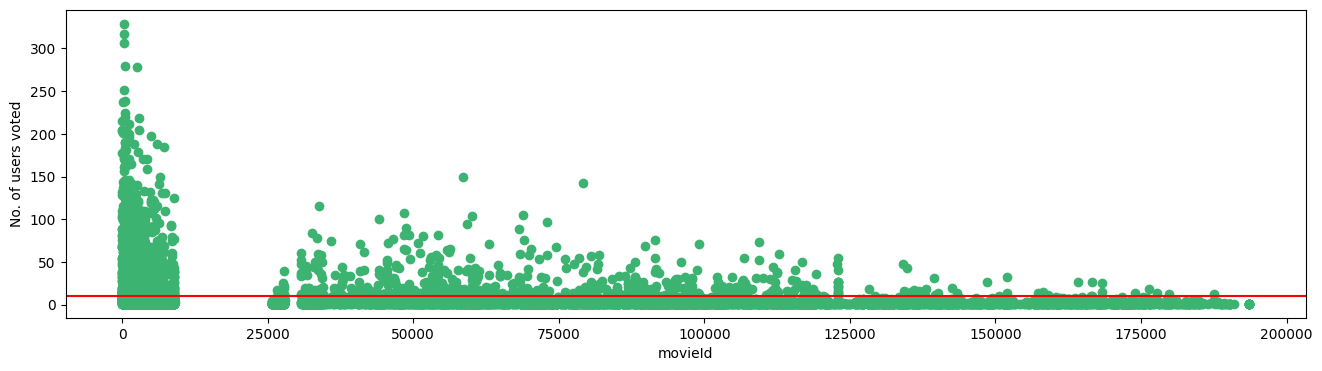

In [ ]:
#creating a scatter plot of the no. of users who have rated each movie and highlights a horizontal red line at a y = 10
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('movieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
#filtering the final_dataset to include only the movies that are rated by more than 10 users
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

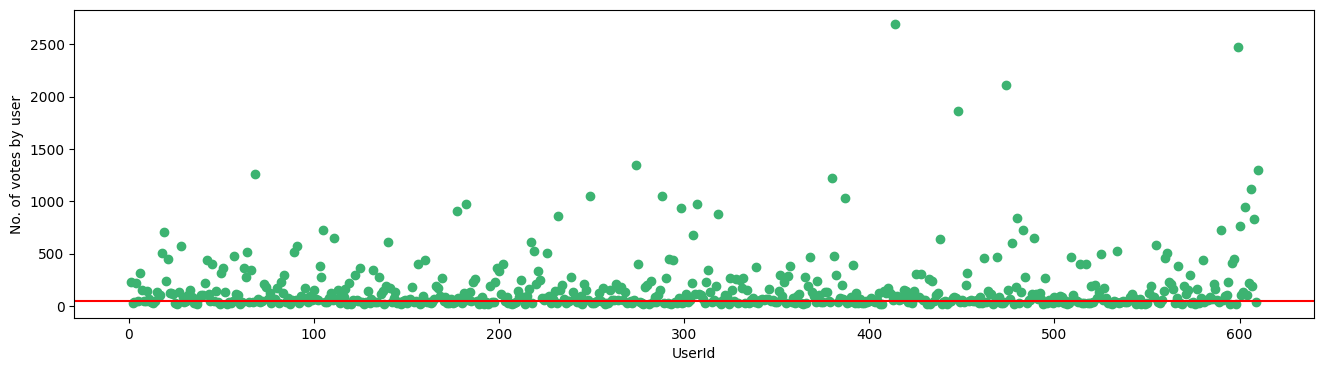

In [ ]:
#creating a scatter plot of the no. of votes for each UserId and highlighting a horizontal red line at a y = 50
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
#filtering of final_dataset to only include users who have voted for more than 50 movies.
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#converting the final_dataset values to a sparse CSR matrix and resetting the dataframe's index.
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
#fitting a K-Nearest Neighbors (KNN) model on the sparse matrix
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
#designing get_movie_recommendation to recommend a list of movies similar to the input movie based on the K-Nearest Neighbors (KNN) model I trained earlier
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies_new[movies_new['title'].str.contains(movie_name)]  # Changed 'movies' to 'movies_new'
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']  # Accessing 'movieId' from movies_new
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies_new[movies_new['movieId'] == movie_idx].index # Changed 'movies' to 'movies_new'
            recommend_frame.append({'Title':movies_new.iloc[idx]['title'].values[0],'Distance':val[1]}) # Changed 'movies' to 'movies_new'
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
#displaying the columns of the movies_new dataframe
print(movies_new.columns)



Index(['movieId', 'title', 'genres'], dtype='object')


In [ ]:
#getting recommendations for 'Iron Man' movie
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [ ]:
#getting recommendations for 'Memento' movie
get_movie_recommendation('Memento')

,Title,Distance
1,Spider-Man (2002),0.000047
2,Pirates of the Caribbean: The Curse of the Bla...,0.000047
3,Donnie Darko (2001),0.000047
4,Kill Bill: Vol. 2 (2004),0.000047
5,Minority Report (2002),0.000047
6,"Lord of the Rings: The Return of the King, The...",0.000043
7,Eternal Sunshine of the Spotless Mind (2004),0.000042
8,Kill Bill: Vol. 1 (2003),0.000042
9,"Lord of the Rings: The Two Towers, The (2002)",0.000041
10,"Lord of the Rings: The Fellowship of the Ring,...",0.000041
